## Simple linear regression

- simple linear regression formula: $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$ or $\hat{y}_i = \beta_0 + \beta_1 x_i$
- error term aka residuals: $\epsilon_i = y_i - \hat{y}_i$
- Residual squares sum (RSS): $\sum_{i = 1}^{n} (\epsilon_i)^2$ OR $\sum_{i = 1}^{n} (y_i - \hat{y}_i)^2$ OR $\sum_{i = i}^{n} (y_i - \beta_0 - \beta_1 x_i)^2$

- Mean square error (MSE) = $\frac{RSS}{n}$ OR $\frac{\sum_{i = 1}^{n} (\epsilon_i)^2}{n}$ OR $\frac{\sum_{i = 1}^{n} (y_i - \hat{y}_i)^2}{n}$
- Root mean square error (RMSE) or Cost = $\sqrt{\frac{RSS}{n}}$ OR $\sqrt{\frac{\sum_{i = 1}^{n} (\epsilon_i)^2}{n}}$ OR $\sqrt{\frac{\sum_{i = 1}^{n} (y_i - \hat{y}_i)^2}{n}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
inp0 = pd.read_csv('advertising.csv')
inp0.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


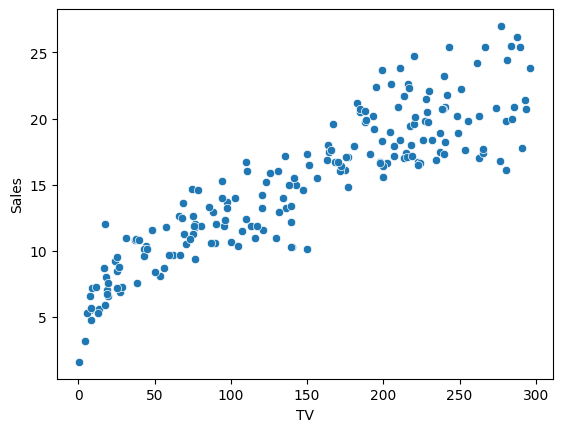

In [3]:
sns.scatterplot(data=inp0, x='TV', y='Sales')
plt.show()

In [4]:
X = np.array(inp0['TV']).reshape(-1, 1)
y = np.array(inp0['Sales']).reshape(-1, 1)

In [5]:
# building the regression model
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [6]:
y_pred = reg.predict(X)

In [7]:
r2_score(y_true=y, y_pred=y_pred)

0.8121757029987414

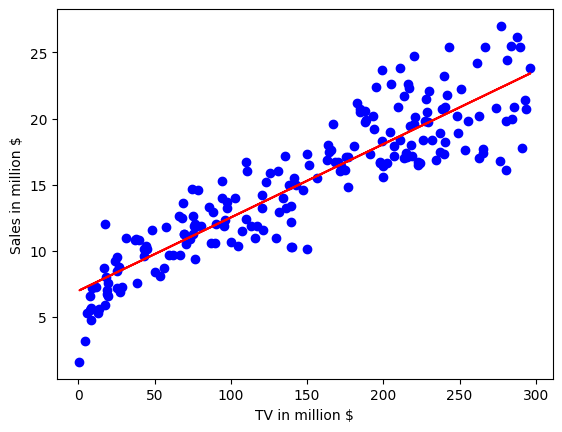

In [8]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.xlabel('TV in million $')
plt.ylabel('Sales in million $')
plt.show()

In [9]:
# get model coefficients
print(reg.intercept_)
print(reg.coef_)

[6.97482149]
[[0.05546477]]


- model equation: $y_i = 6.97482149 + 0.05546477x_i$

In [10]:
residuals = y - y_pred
rss = np.sum(np.square(residuals))
print(rss)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(rmse)

1043.5487795590257
2.2842381438447106


The <b>gradient of a function is</b> a vector that points in the <b>direction of the steepest increase</b> of that function. For a cost function, the gradient tells you how to adjust your model's parameters (like weights in a neural network) to increase the cost.

- Instead of using gradient descent, we can also calculate the values of $\beta_0$ and $\beta_1$ through derivatives
- To get the minima, $\frac{d}{d\beta_0}(RSS) = 0$ & $\frac{d}{d\beta_1}(RSS) = 0$

- We get $\beta_0 = \bar{y} - \beta_1\bar{x}$
- and $\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^{n}(x_i - \bar{x})^2}$

In [13]:
X = inp0['TV'].values # X is ndarray
y = inp0['Sales'].values # y is ndarray

In [15]:
X_mean = np.mean(X) # numpy.float64
y_mean = np.mean(y) # numpy.float64

In [25]:
numerator = np.sum([(x_i - X_mean)*(y_i - y_mean) for x_i, y_i in zip(X, y)])
denominator = np.sum([(x_i - X_mean)**2 for x_i in X])
b1 = numerator/denominator
b0 = y_mean - b1*X_mean
(float(b0), float(b1))

(6.974821488229894, 0.055464770469558854)

- Let's represent the formula for SLR in vector/matrix form
- $\begin{bmatrix}y_1\\ y_2\\ ...\\ y_n \end{bmatrix} = \begin{bmatrix}1 & x_1\\ 1 & x_2\\ ...\\ 1 & x_n\end{bmatrix} \begin{bmatrix}\beta_0\\ \beta_1\end{bmatrix} + \begin{bmatrix}\epsilon_1\\ \epsilon_2\\ ...\\ \epsilon_n\end{bmatrix}$

- The X matrix made from the predictors is also known as <b>design matrix</b>
- Concise notation: $Y = X\beta + \epsilon$
- error term: $\epsilon = Y - X\beta$
- RSS = $\epsilon^{\top}\epsilon = (Y - X\beta)^{\top}(Y - X\beta)$
- this results in $\beta = \begin{bmatrix}\beta_0\\ \beta_1\end{bmatrix} = (X^{\top}X)^{-1}(X^{\top}Y)$

In [47]:
X = inp0['TV'].values.reshape(-1, 1)
X = np.concatenate((np.ones((X.size, 1)), X), axis=1)
X # (200, 2)

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

In [46]:
Y = inp0['Sales'].values.reshape(-1, 1)
Y # (200, 1)

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

In [51]:
X_transpose = X.T
X_transpose # (2, 200)

array([[  1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
          1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,   1. ,
      

In [55]:
first_term = np.linalg.inv(X_transpose.dot(X))
first_term # (2, 2)

array([[ 1.97403984e-02, -1.00245836e-04],
       [-1.00245836e-04,  6.81747360e-07]])

In [57]:
second_term = X_transpose.dot(Y)
second_term # (2, 1)

array([[  3026.1 ],
       [526322.09]])

In [60]:
beta = first_term.dot(second_term)
beta

array([[6.97482149],
       [0.05546477]])

### Assumptions of linear regression

- the residuals/error-terms when plotted against index, should be <b>homoscadastic</b> with a horizontal band. This in conjunction with the histogram of residuals which should look like a normal distribution, explains that the residuals are random and there are no inherent patterns. 
- the plot of y_pred vs residuals should have no pattern and should be randomly scattered, this explains that y_pred has no correlation with the residuals, this means there is no remaining feature which contributes to y_pred, which is left out. If there was such a feature that was left out, we will see a proper pattern between y_pred and residuals.This also shows that the error terms are <b>independent</b> of each other.